<a href="https://colab.research.google.com/github/MikeXia369-glitch/Music-Genre-Classification-Using-Spotify-Audio-Features/blob/main/Music_Genre_Classification_Using_Spotify_Audio_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [ ]:
# ======================
# Core Libraries
# ======================
import numpy as np
import pandas as pd
import random

# ======================
# Visualization
# ======================
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# Preprocessing & Pipeline
# ======================
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize

# ======================
# Dimensionality Reduction & Clustering
# ======================
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ======================
# Models
# ======================
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# ======================
# Model Evaluation
# ======================
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

# ======================
# Utilities
# ======================
from scipy.interpolate import interp1d


# Data load

In [ ]:
# Initialize the random number generator's seed with N-number
random.seed(18489155)

# Load the musicData.csv file into a pandas DataFrame
df = pd.read_csv('musicData.csv')

In [ ]:
df.shape

(50005, 18)

In [ ]:
# Display the first 5 rows of the DataFrame
print("\n--- First 5 rows of the DataFrame ---")
df.head()


--- First 5 rows of the DataFrame ---


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# Display a summary of the DataFrame including data types and non-null values
print("\n--- DataFrame Info ---")
df.info()


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence         

In [ ]:
# Display descriptive statistics for the numerical features
print("\n--- Descriptive Statistics ---")
df.describe()


--- Descriptive Statistics ---


,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


# Data Preprocessing

In [ ]:
# Check and remove duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_rows}")

df = df.drop_duplicates().reset_index(drop=True)

print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 4
Number of duplicate rows after removal: 0


In [ ]:
# Remove invalid duration values (non-positive durations)
df = df[df['duration_ms'] >=0].reset_index(drop=True)

print(f"Data shape after removing invalid duration_ms: {df.shape}")

Data shape after removing invalid duration_ms: (45061, 18)


In [ ]:
# Convert tempo to numeric
df['tempo'] = pd.to_numeric(df['tempo'], errors='coerce')
print(f"Missing values in tempo after conversion: {df['tempo'].isnull().sum()}")
df.info()

Missing values in tempo after conversion: 4501
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45061 entries, 0 to 45060
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       45061 non-null  float64
 1   artist_name       45061 non-null  object 
 2   track_name        45061 non-null  object 
 3   popularity        45061 non-null  float64
 4   acousticness      45061 non-null  float64
 5   danceability      45061 non-null  float64
 6   duration_ms       45061 non-null  float64
 7   energy            45061 non-null  float64
 8   instrumentalness  45061 non-null  float64
 9   key               45061 non-null  object 
 10  liveness          45061 non-null  float64
 11  loudness          45061 non-null  float64
 12  mode              45061 non-null  object 
 13  speechiness       45061 non-null  float64
 14  tempo             40560 non-null  float64
 15  obtained_date     45061 non-null  object

In [ ]:
# Convert instance_id to integer
df['instance_id'] = df['instance_id'].astype(int)
df.dtypes

,0
instance_id,int64
artist_name,object
track_name,object
popularity,float64
acousticness,float64
danceability,float64
duration_ms,float64
energy,float64
instrumentalness,float64
key,object


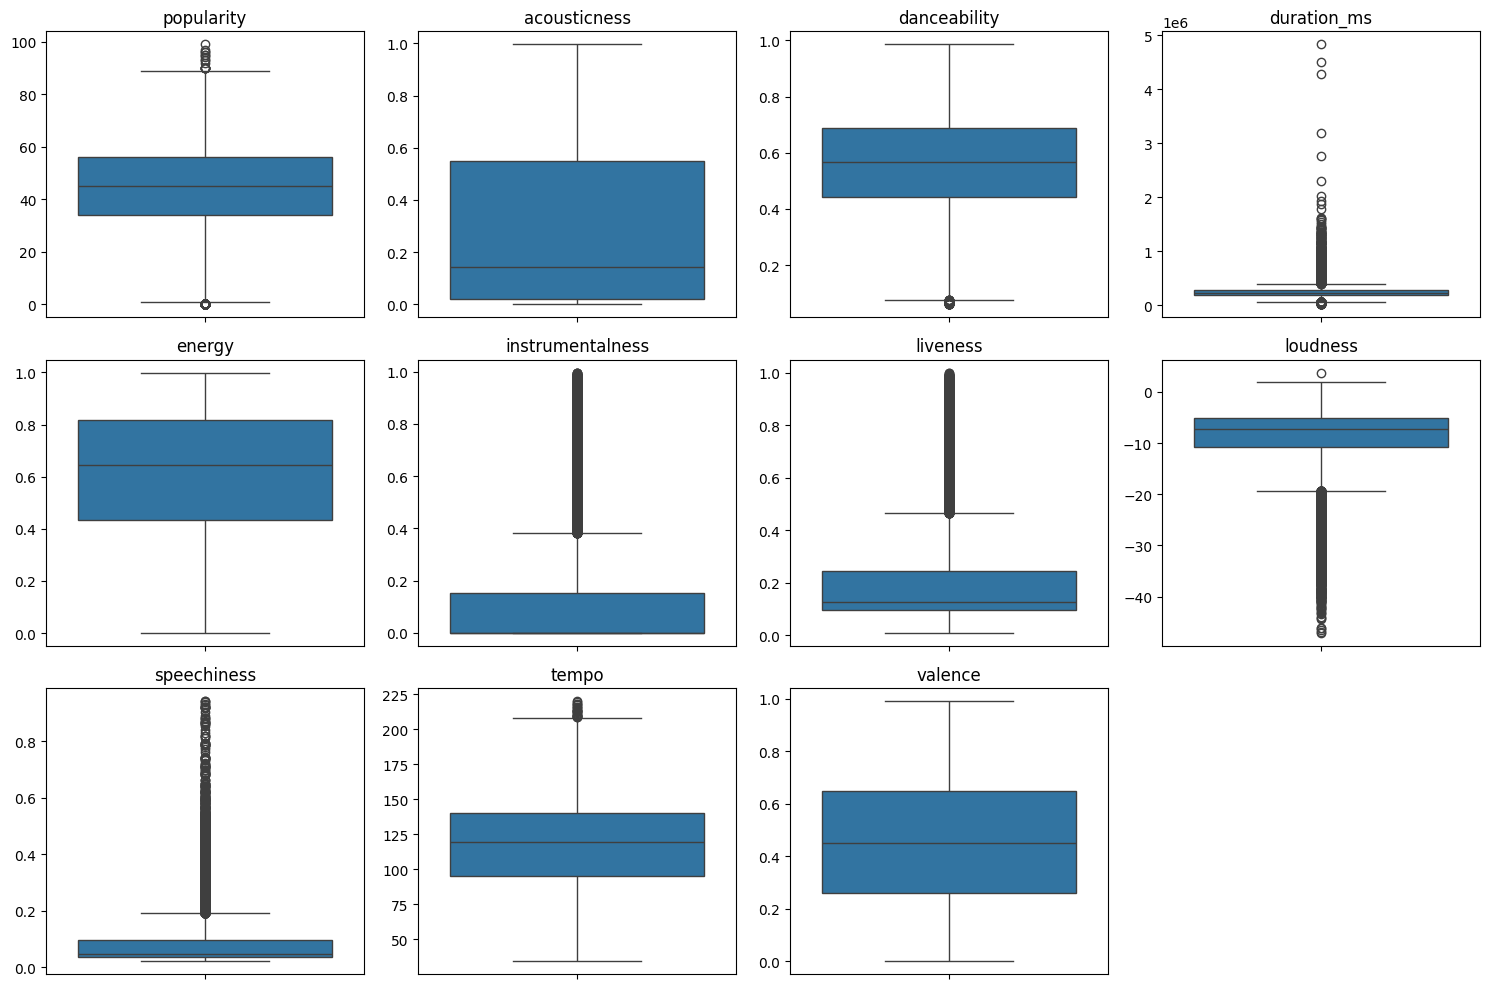

In [ ]:
numerical_cols = [
    'popularity', 'acousticness', 'danceability', 'duration_ms',
    'energy', 'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel('')
plt.tight_layout()
plt.show()


In [ ]:
columns_to_drop = ['obtained_date', 'instance_id', 'artist_name', 'track_name']
df = df.drop(columns=columns_to_drop)

print(f"DataFrame shape after dropping irrelevant columns: {df.shape}")

DataFrame shape after dropping irrelevant columns: (45061, 14)


In [ ]:
df = pd.get_dummies(df, columns=['key'], drop_first=True)
print("DataFrame shape after one-hot encoding 'key' column:", df.shape)

DataFrame shape after one-hot encoding 'key' column: (45061, 24)


In [ ]:
print("--- First 5 rows of the modified DataFrame ---")
df.head()

print("\n--- DataFrame Info after modifications ---")
df.info()

--- First 5 rows of the modified DataFrame ---

--- DataFrame Info after modifications ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45061 entries, 0 to 45060
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45061 non-null  float64
 1   acousticness      45061 non-null  float64
 2   danceability      45061 non-null  float64
 3   duration_ms       45061 non-null  float64
 4   energy            45061 non-null  float64
 5   instrumentalness  45061 non-null  float64
 6   liveness          45061 non-null  float64
 7   loudness          45061 non-null  float64
 8   mode              45061 non-null  object 
 9   speechiness       45061 non-null  float64
 10  tempo             40560 non-null  float64
 11  valence           45061 non-null  float64
 12  music_genre       45061 non-null  object 
 13  key_A#            45061 non-null  bool   
 14  key_B             45061 non-null  bool   
 

In [ ]:
print("Confirming that the 'key' column has been one-hot encoded.")
print("--- First 5 rows of the DataFrame showing key columns ---")
# Display only the relevant columns to verify one-hot encoding for 'key'
key_cols = [col for col in df.columns if col.startswith('key_')]
display(df[key_cols + ['music_genre']].head())

print("\n--- DataFrame Info after one-hot encoding ---")
df.info()

Confirming that the 'key' column has been one-hot encoded.
--- First 5 rows of the DataFrame showing key columns ---


,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,music_genre
0,False,False,False,False,True,False,False,False,False,False,False,Electronic
1,False,False,False,False,False,False,False,False,False,False,True,Electronic
2,False,False,False,True,False,False,False,False,False,False,False,Electronic
3,False,False,False,False,False,False,False,False,True,False,False,Electronic
4,False,False,False,False,True,False,False,False,False,False,False,Electronic



--- DataFrame Info after one-hot encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45061 entries, 0 to 45060
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45061 non-null  float64
 1   acousticness      45061 non-null  float64
 2   danceability      45061 non-null  float64
 3   duration_ms       45061 non-null  float64
 4   energy            45061 non-null  float64
 5   instrumentalness  45061 non-null  float64
 6   liveness          45061 non-null  float64
 7   loudness          45061 non-null  float64
 8   mode              45061 non-null  object 
 9   speechiness       45061 non-null  float64
 10  tempo             40560 non-null  float64
 11  valence           45061 non-null  float64
 12  music_genre       45061 non-null  object 
 13  key_A#            45061 non-null  bool   
 14  key_B             45061 non-null  bool   
 15  key_C             45061 non-null  bool  

In [ ]:
# Identify all columns that start with 'key_'
key_cols = [col for col in df.columns if col.startswith('key_')]

print("Converting 'key_' boolean columns to integer (0 or 1)...")
for col in key_cols:
    df[col] = df[col].astype(int)

print("\n--- First 5 rows of 'key_' columns after conversion ---")
display(df[key_cols].head())

print("\n--- Data types of 'key_' columns after conversion ---")
display(df[key_cols].dtypes)

print("\n'key_' columns successfully converted to integer type.")

Converting 'key_' boolean columns to integer (0 or 1)...

--- First 5 rows of 'key_' columns after conversion ---


,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0



--- Data types of 'key_' columns after conversion ---


,0
key_A#,int64
key_B,int64
key_C,int64
key_C#,int64
key_D,int64
key_D#,int64
key_E,int64
key_F,int64
key_F#,int64
key_G,int64



'key_' columns successfully converted to integer type.


In [ ]:
df['mode']

,mode
0,Minor
1,Major
2,Major
3,Major
4,Minor
...,...
45056,Major
45057,Major
45058,Major
45059,Minor


In [ ]:
# Convert 'mode' column to numerical: Minor=0, Major=1
df['mode'] = df['mode'].map({'Minor': 0, 'Major': 1})

print("--- First 5 rows of 'mode' column after conversion ---")
display(df['mode'].head())

print("\n--- Data type of 'mode' column after conversion ---")
display(df['mode'].dtype)


--- First 5 rows of 'mode' column after conversion ---


,mode
0,0
1,1
2,1
3,1
4,0



--- Data type of 'mode' column after conversion ---


dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45061 entries, 0 to 45060
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45061 non-null  float64
 1   acousticness      45061 non-null  float64
 2   danceability      45061 non-null  float64
 3   duration_ms       45061 non-null  float64
 4   energy            45061 non-null  float64
 5   instrumentalness  45061 non-null  float64
 6   liveness          45061 non-null  float64
 7   loudness          45061 non-null  float64
 8   mode              45061 non-null  int64  
 9   speechiness       45061 non-null  float64
 10  tempo             40560 non-null  float64
 11  valence           45061 non-null  float64
 12  music_genre       45061 non-null  object 
 13  key_A#            45061 non-null  int64  
 14  key_B             45061 non-null  int64  
 15  key_C             45061 non-null  int64  
 16  key_C#            45061 non-null  int64 

# Split

In [ ]:
random.seed(18489155)
np.random.seed(18489155)

train_dfs = []
test_dfs = []

for genre, group in df.groupby('music_genre'):
    train_g, test_g = train_test_split(
        group,
        test_size=500,
        random_state=18489155,
        shuffle=True
    )
    train_dfs.append(train_g)
    test_dfs.append(test_g)

train_df = pd.concat(train_dfs).reset_index(drop=True)
test_df = pd.concat(test_dfs).reset_index(drop=True)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("\nTest set genre counts:")
print(test_df['music_genre'].value_counts())


Train shape: (40061, 24)
Test shape: (5000, 24)

Test set genre counts:
music_genre
Alternative    500
Anime          500
Blues          500
Classical      500
Country        500
Electronic     500
Hip-Hop        500
Jazz           500
Rap            500
Rock           500
Name: count, dtype: int64


In [ ]:
X_train = train_df.drop(columns=['music_genre'])
y_train = train_df['music_genre']

X_test = test_df.drop(columns=['music_genre'])
y_test = test_df['music_genre']

# Pipeline

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

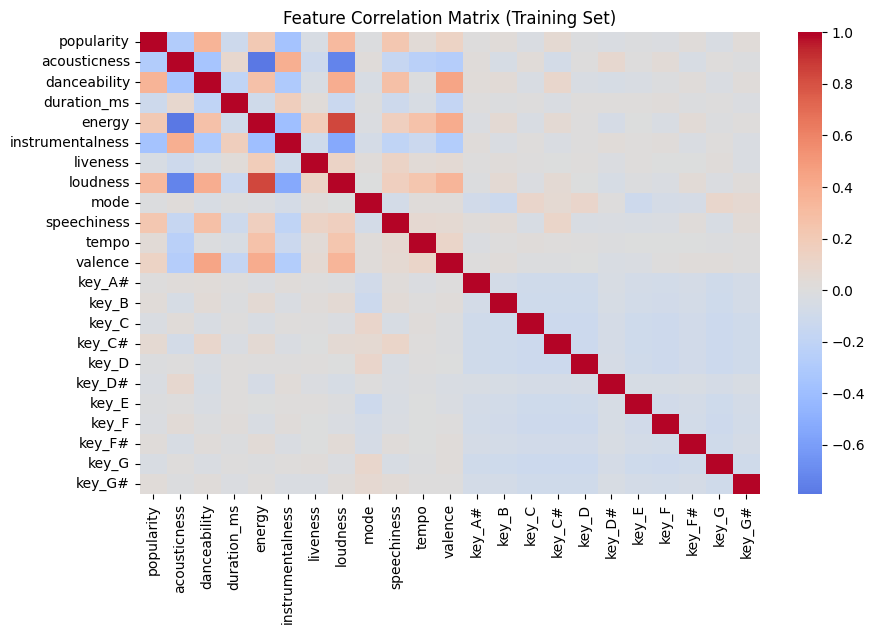

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    pd.DataFrame(X_train).corr(),
    cmap='coolwarm',
    center=0
)
plt.title("Feature Correlation Matrix (Training Set)")
plt.show()

In [ ]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9, random_state=18489155))
])
X_train_proc = pipeline.fit_transform(X_train)
X_test_proc = pipeline.transform(X_test)
print(X_train_proc.shape)
print(X_test_proc.shape)

(40061, 17)
(5000, 17)


# PCA

In [ ]:
pca = pipeline.named_steps['pca']

explained_var = pca.explained_variance_ratio_
cum_explained_var = explained_var.cumsum()

for i, v in enumerate(cum_explained_var, 1):
    print(f"PC{i}: cumulative explained variance = {v:.3f}")

PC1: cumulative explained variance = 0.163
PC2: cumulative explained variance = 0.224
PC3: cumulative explained variance = 0.282
PC4: cumulative explained variance = 0.332
PC5: cumulative explained variance = 0.381
PC6: cumulative explained variance = 0.430
PC7: cumulative explained variance = 0.477
PC8: cumulative explained variance = 0.525
PC9: cumulative explained variance = 0.572
PC10: cumulative explained variance = 0.618
PC11: cumulative explained variance = 0.664
PC12: cumulative explained variance = 0.709
PC13: cumulative explained variance = 0.753
PC14: cumulative explained variance = 0.795
PC15: cumulative explained variance = 0.835
PC16: cumulative explained variance = 0.871
PC17: cumulative explained variance = 0.905


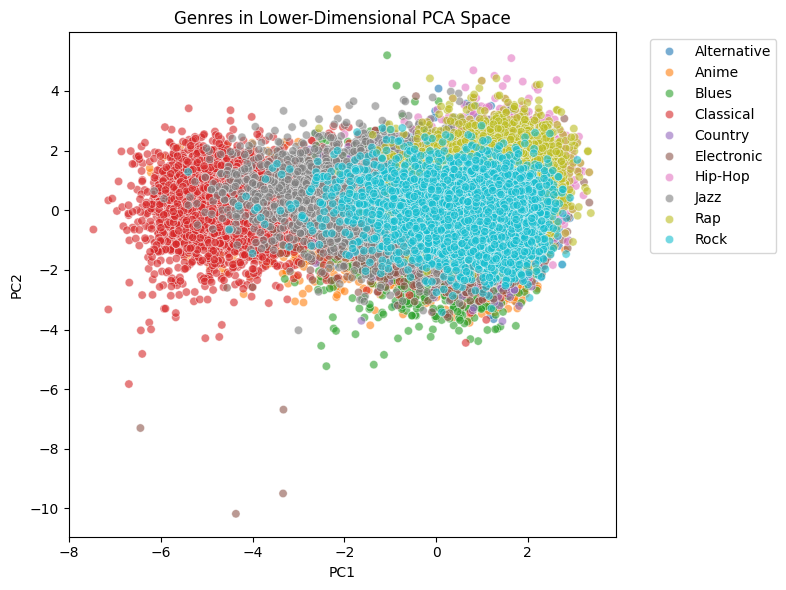

In [ ]:
X_pca_2d = X_train_proc[:, :2]

pca_df = pd.DataFrame({
    'PC1': X_pca_2d[:, 0],
    'PC2': X_pca_2d[:, 1],
    'Genre': le.inverse_transform(y_train_enc)
})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x='PC1',
    y='PC2',
    hue='Genre',
    palette='tab10',
    alpha=0.6
)

plt.title("Genres in Lower-Dimensional PCA Space")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# K Mean

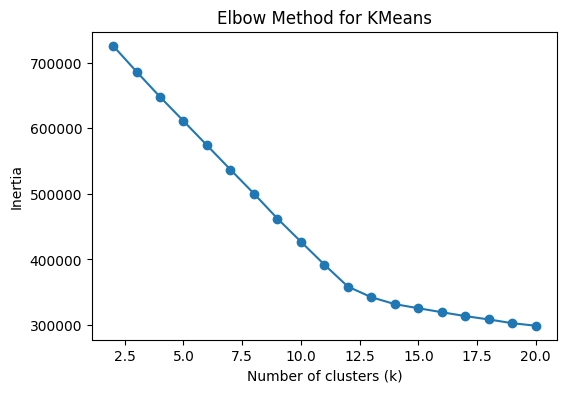

In [ ]:
inertias = []
K_range = range(2, 21)

for k in K_range:
    km = KMeans(
        n_clusters=k,
        random_state=18489155,
        n_init=10
    )
    km.fit(X_train_proc)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

# Model



In [ ]:
X_train = X_train_proc
X_test = X_test_proc
y_train = y_train_enc
y_test = y_test_enc

## Single tree

In [ ]:
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_leaf=50,
    random_state=18489155,
)

# Train the Decision Tree model
dt.fit(X_train, y_train)

# Make predictions (class labels) and probabilities on the test data
y_score = dt.predict_proba(X_test)

n_classes = y_score.shape[1]

y_test_bin = label_binarize(
    y_test,
    classes=range(n_classes)
)


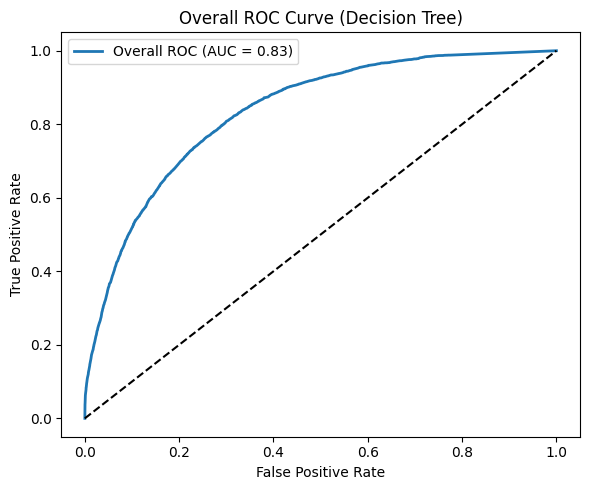

In [ ]:
fpr, tpr, _ = roc_curve(
    y_test_bin.ravel(),
    y_score.ravel()
)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))

plt.plot(
    fpr,
    tpr,
    label=f"Overall ROC (AUC = {roc_auc:.2f})",
    linewidth=2
)

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Overall ROC Curve (Decision Tree)")
plt.legend()
plt.tight_layout()
plt.show()


## Random Forest (Bagging)

In [ ]:
rf_model= RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_leaf=50,
    random_state=18489155,
)
# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions (class labels) and probabilities on the test data
y_pred_rf = rf_model.predict(X_test)
y_score_rf = rf_model.predict_proba(X_test)

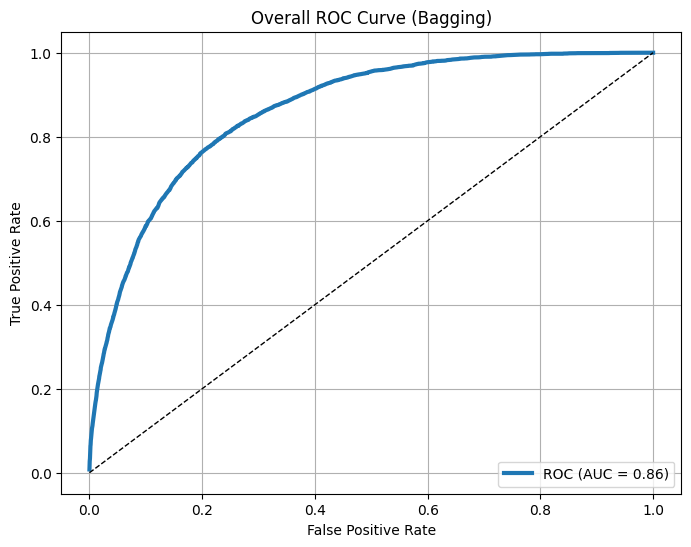

AUROC (Random Forest): 0.86


In [ ]:
n_classes = len(np.unique(y_test))

# Binarize the true labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    interp_tpr = interp1d(fpr[i], tpr[i], kind='linear')
    mean_tpr += interp_tpr(all_fpr)

# Average and compute AUC
mean_tpr /= n_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_macro,
    tpr_macro,
    label=f"ROC (AUC = {roc_auc_macro:.2f})",
    linewidth=3
)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Overall ROC Curve (Bagging)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUROC (Random Forest): {roc_auc_macro:.2f}")

## Random Forest(XGBoost)

In [ ]:
# Initialize the XGBoost Classifier
xgb_model = XGBClassifier(
    objective='multi:softprob', # For multi-class classification with probability output
    num_class=len(np.unique(y_train)), # Number of classes
    max_depth=10,
    min_child_weight=50, # Analogous to min_samples_leaf
    use_label_encoder=False, # Suppress warning
    eval_metric='mlogloss', # Evaluation metric for multi-class
    random_state=18489155,
    n_jobs=-1 # Use all available cores
)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions (class labels) and probabilities on the test data
y_pred_xgb = xgb_model.predict(X_test)
y_score_xgb = xgb_model.predict_proba(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:27:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


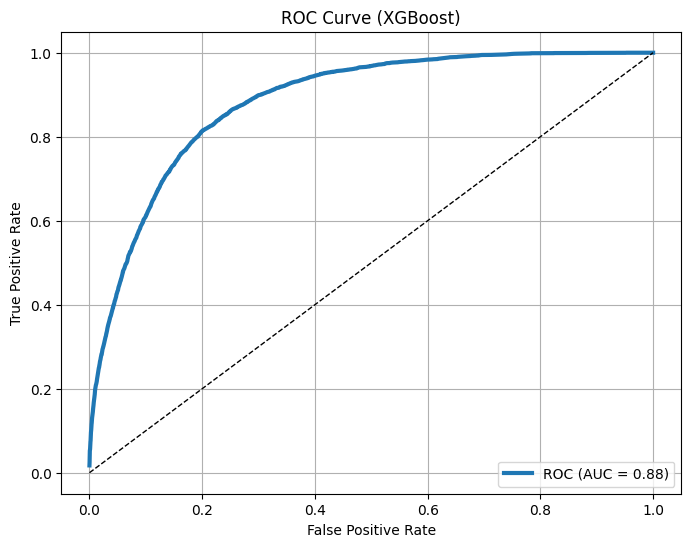

AUROC (XGBoost): 0.88


In [ ]:
# Overall Macro-average ROC Curve for XGBoost

# Number of classes
n_classes = len(np.unique(y_test))

# Binarize the true labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    interp_tpr = interp1d(fpr[i], tpr[i], kind='linear')
    mean_tpr += interp_tpr(all_fpr)

# Average and compute AUC
mean_tpr /= n_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_macro,
    tpr_macro,
    label=f"ROC (AUC = {roc_auc_macro:.2f})",
    linewidth=3
)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUROC (XGBoost): {roc_auc_macro:.2f}")

## Multi-layer Perceptron (MLP with only one hidden layer)

In [ ]:
# Initialize the MLPClassifier (simple Neural Network)
# hidden_layer_sizes: defines the architecture of the hidden layers
# max_iter: maximum number of iterations for the solver to converge
# activation: activation function for the hidden layer
# solver: algorithm for weight optimization
# random_state: for reproducibility
# early_stopping: terminate training when validation score is not improving
mlp_simple_model = MLPClassifier(
    hidden_layer_sizes=(100,), # One hidden layer with 100 neurons
    max_iter=300,
    activation='relu',
    solver='adam',
    random_state=18489155,
    early_stopping=True,
    n_iter_no_change=10 # Number of iterations with no improvement to wait
)

# Train the Neural Network model
mlp_simple_model.fit(X_train, y_train)

# Make predictions (class labels) and probabilities on the test data
y_pred_mlp_simple = mlp_simple_model.predict(X_test)
y_score_mlp_simple = mlp_simple_model.predict_proba(X_test)

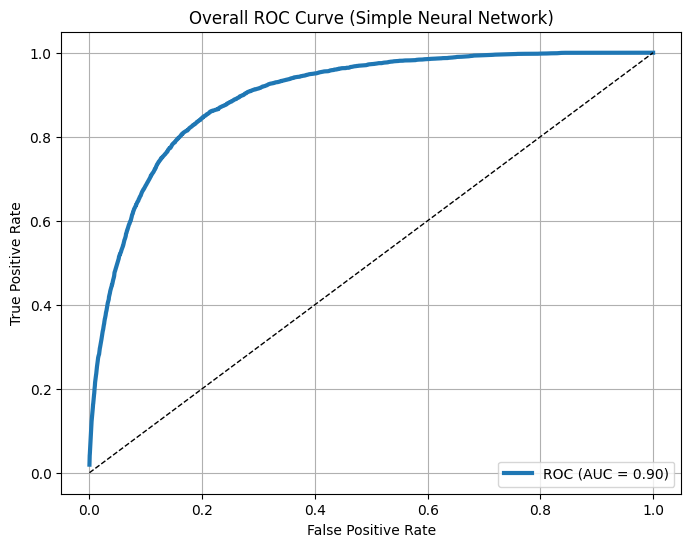

AUROC (Simple Neural Network): 0.90


In [ ]:
n_classes = len(np.unique(y_test))

# Binarize the true labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_mlp_simple[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    interp_tpr = interp1d(fpr[i], tpr[i], kind='linear')
    mean_tpr += interp_tpr(all_fpr)

# Average and compute AUC
mean_tpr /= n_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = auc(fpr_macro, tpr_macro)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_macro,
    tpr_macro,
    label=f"ROC (AUC = {roc_auc_macro:.2f})",
    linewidth=3
)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Overall ROC Curve (Simple Neural Network)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUROC (Simple Neural Network): {roc_auc_macro:.2f}")

## Multi-layer Perceptron (MLP)

In [ ]:
# Initialize the MLP Classifier
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,50,25), # Three hidden layers with 100 and 50 and 25 neurons respectively
    max_iter=500, # Maximum number of iterations
    activation='relu', # Activation function for the hidden layer
    solver='adam', # The solver for weight optimization
    random_state=18489155,
    early_stopping=True, # Stop if validation score is not improving
    n_iter_no_change=10 # Number of iterations with no improvement to wait before stopping
)

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Make predictions (class labels) and probabilities on the test data
y_pred_mlp = mlp_model.predict(X_test)
y_score_mlp = mlp_model.predict_proba(X_test)

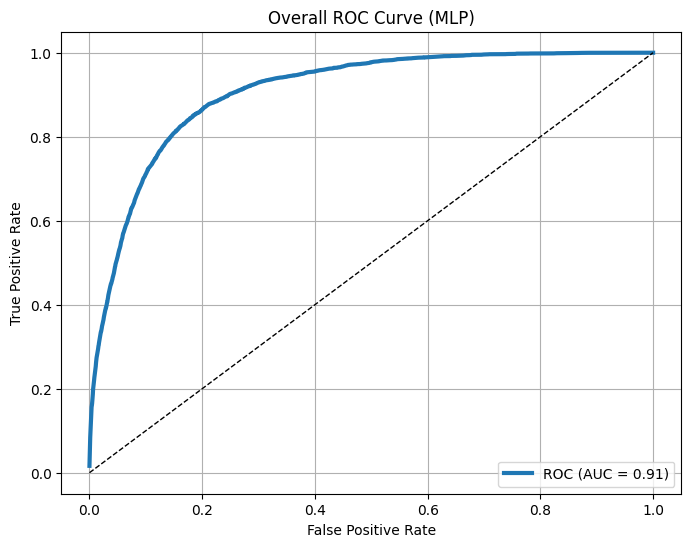

AUROC (MLP): 0.91


In [ ]:
# Overall Macro-average ROC Curve for MLP

# Number of classes
n_classes = len(np.unique(y_test))

# Binarize the true labels for ROC curve calculation
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_mlp[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    interp_tpr = interp1d(fpr[i], tpr[i], kind='linear')
    mean_tpr += interp_tpr(all_fpr)

# Average and compute AUC
mean_tpr /= n_classes

fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_MLP = auc(fpr_macro, tpr_macro)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_macro,
    tpr_macro,
    label=f"ROC (AUC = {roc_auc_MLP:.2f})",
    linewidth=3
)

plt.plot([0, 1], [0, 1], 'k--', linewidth=1)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Overall ROC Curve (MLP)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"AUROC (MLP): {roc_auc_MLP:.2f}")

# Summary

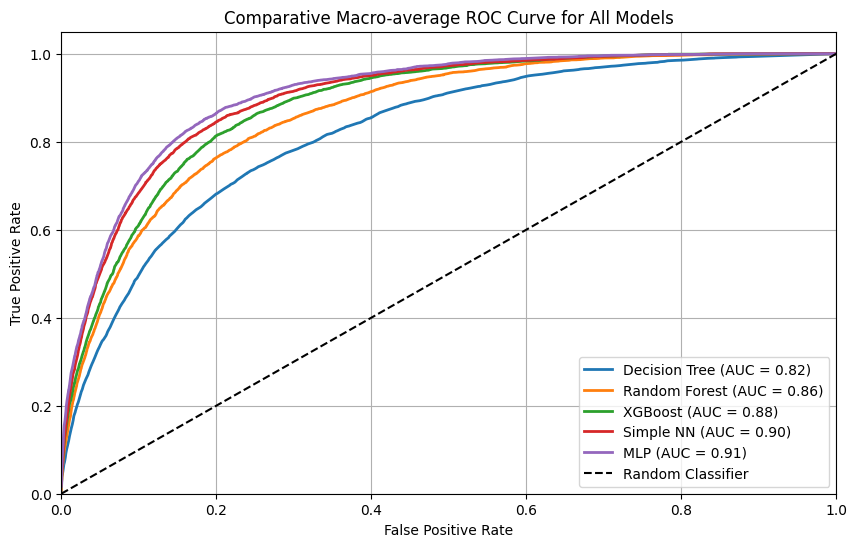


--- Comparative AUROC Scores ---
Decision Tree AUROC: 0.82
Random Forest AUROC: 0.86
XGBoost AUROC: 0.88
Simple Neural Network AUROC: 0.90
MLP AUROC: 0.91


In [ ]:
def calculate_macro_roc(y_true, y_score, n_classes):
    """Calculates macro-average ROC curve points and AUC."""
    y_true_binarized = label_binarize(y_true, classes=range(n_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        interp_tpr = interp1d(fpr[i], tpr[i], kind='linear')
        mean_tpr += interp_tpr(all_fpr)

    mean_tpr /= n_classes

    fpr_macro = all_fpr
    tpr_macro = mean_tpr
    roc_auc_macro = auc(fpr_macro, tpr_macro)

    return fpr_macro, tpr_macro, roc_auc_macro

# Number of classes
n_classes = len(np.unique(y_test))

plt.figure(figsize=(10, 6))

# Decision Tree ROC
fpr_dt, tpr_dt, roc_auc_dt = calculate_macro_roc(y_test, y_score, n_classes)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', linewidth=2)

# Random Forest ROC
fpr_rf, tpr_rf, roc_auc_rf = calculate_macro_roc(y_test, y_score_rf, n_classes)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', linewidth=2)

# XGBoost ROC
fpr_xgb, tpr_xgb, roc_auc_xgb = calculate_macro_roc(y_test, y_score_xgb, n_classes)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})', linewidth=2)

# Simple Neural Network ROC
fpr_mlp_simple, tpr_mlp_simple, roc_auc_mlp_simple = calculate_macro_roc(y_test, y_score_mlp_simple, n_classes)
plt.plot(fpr_mlp_simple, tpr_mlp_simple, label=f'Simple NN (AUC = {roc_auc_mlp_simple:.2f})', linewidth=2)

# Multi-layer Perceptron ROC
fpr_mlp, tpr_mlp, roc_auc_mlp = calculate_macro_roc(y_test, y_score_mlp, n_classes)
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_MLP:.2f})', linewidth=2)


plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Simplified this line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative Macro-average ROC Curve for All Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\n--- Comparative AUROC Scores ---")
print(f"Decision Tree AUROC: {roc_auc_dt:.2f}")
print(f"Random Forest AUROC: {roc_auc_rf:.2f}")
print(f"XGBoost AUROC: {roc_auc_xgb:.2f}")
print(f"Simple Neural Network AUROC: {roc_auc_mlp_simple:.2f}")
print(f"MLP AUROC: {roc_auc_MLP:.2f}")

# Extra

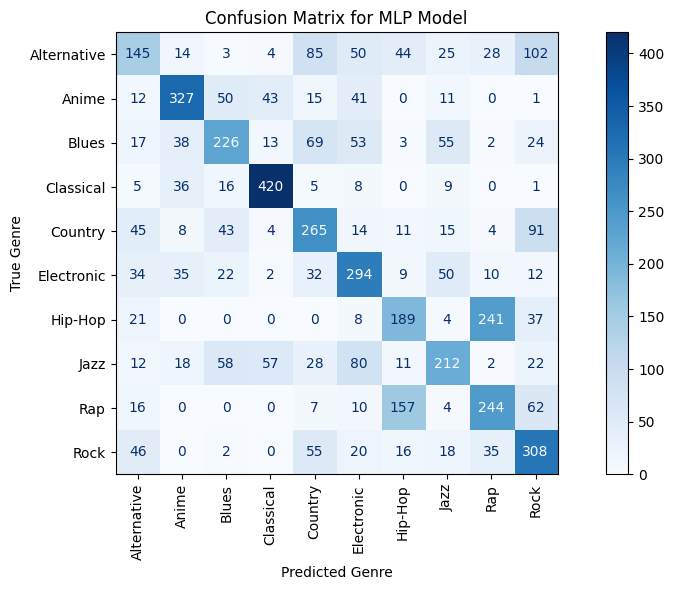

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the actual genre names from the LabelEncoder
genre_names = le.classes_

# Calculate the confusion matrix for the best model (MLP)
cm = confusion_matrix(y_test, y_pred_mlp)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genre_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
disp.plot(cmap='Blues', ax=ax, xticks_rotation='vertical', values_format='d')
ax.set_title('Confusion Matrix for MLP Model')
ax.set_xlabel('Predicted Genre')
ax.set_ylabel('True Genre')
plt.tight_layout()
plt.show()